<h1>IMPORTS</h1>

In [16]:
from nbodykit.lab import *
import matplotlib.pyplot as plt

#%matplotlib inline

import numpy as np
from nbodykit.source import catalog
from nbodykit import CurrentMPIComm
from nbodykit.algorithms.paircount_tpcf.estimators import LandySzalayEstimator
import logging
from nbodykit.binned_statistic import BinnedStatistic

#from nbodykit.source import estimators

<h1>LOAD DATA</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [17]:
from LoadCat import LoadHaloCatNbodykit
from LoadCat import LoadVoidCatNbodykit

print("No axions, 1024 res")

HaloMassBin1 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_massmin_680000000000.0_massmax_3927384460000.0.npy")
HaloMassBin2 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_massmin_3927384460000.0_massmax_22682865800000.0.npy")
HaloMassBin3 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_massmin_22682865800000.0_massmax_131006373999999.98.npy")
HaloMassBin4 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_massmin_131006373999999.98_massmax_756635880000000.0.npy")
HaloMassBin5 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_massmin_756635880000000.0_massmax_4370000000000000.0.npy")

HaloMassBin1_Random = LoadHaloCatNbodykit("RandomHalos_MassBin1.npy")
HaloMassBin2_Random = LoadHaloCatNbodykit("RandomHalos_MassBin2.npy")
HaloMassBin3_Random = LoadHaloCatNbodykit("RandomHalos_MassBin3.npy")
HaloMassBin4_Random = LoadHaloCatNbodykit("RandomHalos_MassBin4.npy")
HaloMassBin5_Random = LoadHaloCatNbodykit("RandomHalos_MassBin5.npy")

VoidMassBin1 = LoadVoidCatNbodykit("Trial_PP_void_catalog_1024Mpc_n2048_massmin_7.12937919e+44_massmax_1.67952207e+46.npy")
VoidMassBin2 = LoadVoidCatNbodykit("Trial_PP_void_catalog_1024Mpc_n2048_massmin_1.67952207e+46_massmax_3.95657784e+47.npy")

VoidMassBin1_Random = LoadVoidCatNbodykit("RandomVoids_MassBin1.npy")
VoidMassBin2_Random = LoadVoidCatNbodykit("RandomVoids_MassBin2.npy")

print("\n")

print("1 25 10, 1024 res")

HaloMassBin1_1_25_10 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_massmin_680000000000.0_massmax_3927384460000.0.npy")
HaloMassBin2_1_25_10 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_massmin_3927384460000.0_massmax_22682865800000.0.npy")
HaloMassBin3_1_25_10 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_massmin_22682865800000.0_massmax_131006373999999.98.npy")
HaloMassBin4_1_25_10 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_massmin_131006373999999.98_massmax_756635880000000.0.npy")
HaloMassBin5_1_25_10 = LoadHaloCatNbodykit("Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_massmin_756635880000000.0_massmax_4370000000000000.0.npy")

HaloMassBin1_Random_1_25_10 = LoadHaloCatNbodykit("RandomHalos_MassBin1_1_25_10.npy")
HaloMassBin2_Random_1_25_10 = LoadHaloCatNbodykit("RandomHalos_MassBin2_1_25_10.npy")
HaloMassBin3_Random_1_25_10 = LoadHaloCatNbodykit("RandomHalos_MassBin3_1_25_10.npy")
HaloMassBin4_Random_1_25_10 = LoadHaloCatNbodykit("RandomHalos_MassBin4_1_25_10.npy")
HaloMassBin5_Random_1_25_10 = LoadHaloCatNbodykit("RandomHalos_MassBin5_1_25_10.npy")

VoidMassBin1_1_25_10 = LoadVoidCatNbodykit("Trial_PP_void_catalog_1024Mpc_n2048_1_25_10_massmin_7.12937919e+44_massmax_1.67952207e+46.npy")
VoidMassBin2_1_25_10 = LoadVoidCatNbodykit("Trial_PP_void_catalog_1024Mpc_n2048_1_25_10_massmin_1.67952207e+46_massmax_3.95657784e+47.npy")

VoidMassBin1_Random_1_25_10 = LoadVoidCatNbodykit("RandomVoids_1_25_10_MassBin1.npy")
VoidMassBin2_Random_1_25_10 = LoadVoidCatNbodykit("RandomVoids_1_25_10_MassBin2.npy")

print("\n")

print("No axions, 512 res")

HaloMassBin1_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_massmin_680000000000.0_massmax_3927384460000.0.npy")
HaloMassBin2_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_massmin_3927384460000.0_massmax_22682865800000.0.npy")
HaloMassBin3_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_massmin_22682865800000.0_massmax_131006374000000.0.npy")
HaloMassBin4_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_massmin_131006374000000.0_massmax_756635880000000.0.npy")
HaloMassBin5_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_massmin_756635880000000.0_massmax_4370000000000000.0.npy")

HaloMassBin1_Random_512res = LoadHaloCatNbodykit("RandomHalos_MassBin1_512res.npy")
HaloMassBin2_Random_512res = LoadHaloCatNbodykit("RandomHalos_MassBin2_512res.npy")
HaloMassBin3_Random_512res = LoadHaloCatNbodykit("RandomHalos_MassBin3_512res.npy")
HaloMassBin4_Random_512res = LoadHaloCatNbodykit("RandomHalos_MassBin4_512res.npy")
HaloMassBin5_Random_512res = LoadHaloCatNbodykit("RandomHalos_MassBin5_512res.npy")

VoidMassBin1_512res = LoadVoidCatNbodykit("Trial_PP_void_catalog_512Mpc_n1024_massmin_7.12937919e+44_massmax_1.67952207e+46.npy")
VoidMassBin2_512res = LoadVoidCatNbodykit("Trial_PP_void_catalog_512Mpc_n1024_massmin_1.67952207e+46_massmax_3.95657784e+47.npy")

VoidMassBin1_Random_512res = LoadVoidCatNbodykit("RandomVoids_MassBin1_512res.npy")
VoidMassBin2_Random_512res = LoadVoidCatNbodykit("RandomVoids_MassBin2_512res.npy")

print("\n")

print("1 25 10, 512 res")

HaloMassBin1_1_25_10_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_680000000000.0_massmax_3927384460000.0.npy")
HaloMassBin2_1_25_10_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_3927384460000.0_massmax_22682865800000.0.npy")
HaloMassBin3_1_25_10_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_22682865800000.0_massmax_131006374000000.0.npy")
HaloMassBin4_1_25_10_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_131006374000000.0_massmax_756635880000000.0.npy")
HaloMassBin5_1_25_10_512res = LoadHaloCatNbodykit("Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_756635880000000.0_massmax_4370000000000000.0.npy")

HaloMassBin1_Random_1_25_10_512res = LoadHaloCatNbodykit("RandomHalos_MassBin1_1_25_10_512res.npy")
HaloMassBin2_Random_1_25_10_512res = LoadHaloCatNbodykit("RandomHalos_MassBin2_1_25_10_512res.npy")
HaloMassBin3_Random_1_25_10_512res = LoadHaloCatNbodykit("RandomHalos_MassBin3_1_25_10_512res.npy")
HaloMassBin4_Random_1_25_10_512res = LoadHaloCatNbodykit("RandomHalos_MassBin4_1_25_10_512res.npy")
HaloMassBin5_Random_1_25_10_512res = LoadHaloCatNbodykit("RandomHalos_MassBin5_1_25_10_512res.npy")

VoidMassBin1_1_25_10_512res = LoadVoidCatNbodykit("Trial_PP_void_catalog_512Mpc_n1024_1_25_10_massmin_7.12937919e+44_massmax_1.67952207e+46.npy")
VoidMassBin2_1_25_10_512res = LoadVoidCatNbodykit("Trial_PP_void_catalog_512Mpc_n1024_1_25_10_massmin_1.67952207e+46_massmax_4.290510561801074e+47.npy")

VoidMassBin1_Random_1_25_10_512res = LoadVoidCatNbodykit("RandomVoids_MassBin1_1_25_10_512res.npy")
VoidMassBin2_Random_1_25_10_512res = LoadVoidCatNbodykit("RandomVoids_MassBin2_1_25_10_512res.npy")

No axions, 1024 res
The Halo Catalog is: ArrayCatalog(size=1515717)
The Halo Catalog is: ArrayCatalog(size=335247)
The Halo Catalog is: ArrayCatalog(size=62552)
The Halo Catalog is: ArrayCatalog(size=7477)
The Halo Catalog is: ArrayCatalog(size=199)
The Halo Catalog is: ArrayCatalog(size=1515717)
The Halo Catalog is: ArrayCatalog(size=335247)
The Halo Catalog is: ArrayCatalog(size=62552)
The Halo Catalog is: ArrayCatalog(size=7477)
The Halo Catalog is: ArrayCatalog(size=199)
The Void Catalog is: ArrayCatalog(size=5699)
The Void Catalog is: ArrayCatalog(size=5399)
The Void Catalog is: ArrayCatalog(size=5699)
The Void Catalog is: ArrayCatalog(size=5399)


1 25 10, 1024 res
The Halo Catalog is: ArrayCatalog(size=1124792)
The Halo Catalog is: ArrayCatalog(size=234785)
The Halo Catalog is: ArrayCatalog(size=44876)
The Halo Catalog is: ArrayCatalog(size=6029)
The Halo Catalog is: ArrayCatalog(size=179)
The Halo Catalog is: ArrayCatalog(size=1124792)
The Halo Catalog is: ArrayCatalog(size=234

<h1>VOID-HALO CORRELATION</h1>

In [3]:
histogram_bins_3d = np.logspace(-1,2.5)

#1024 RES, VOID MASS BIN 1, NO AXIONS
corr_voidhalo_HaloMass1_VoidMass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1, VoidMassBin1, HaloMassBin1_Random, VoidMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2, VoidMassBin1, HaloMassBin2_Random, VoidMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3, VoidMassBin1, HaloMassBin3_Random, VoidMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4, VoidMassBin1, HaloMassBin4_Random, VoidMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5, VoidMassBin1, HaloMassBin5_Random, VoidMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#1024 RES, VOID MASS BIN 2, NO AXIONS
corr_voidhalo_HaloMass1_VoidMass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1, VoidMassBin2, HaloMassBin1_Random, VoidMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2, VoidMassBin2, HaloMassBin2_Random, VoidMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3, VoidMassBin2, HaloMassBin3_Random, VoidMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4, VoidMassBin2, HaloMassBin4_Random, VoidMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5, VoidMassBin2, HaloMassBin5_Random, VoidMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#1024 RES, VOID MASS BIN 1, WITH AXIONS
corr_voidhalo_HaloMass1_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10, VoidMassBin1_1_25_10, HaloMassBin1_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10, VoidMassBin1_1_25_10, HaloMassBin2_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10, VoidMassBin1_1_25_10, HaloMassBin3_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10, VoidMassBin1_1_25_10, HaloMassBin4_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10, VoidMassBin1_1_25_10, HaloMassBin5_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#1024 RES, VOID MASS BIN 2, WITH AXIONS
corr_voidhalo_HaloMass1_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10, VoidMassBin2_1_25_10, HaloMassBin1_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10, VoidMassBin2_1_25_10, HaloMassBin2_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10, VoidMassBin2_1_25_10, HaloMassBin3_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10, VoidMassBin2_1_25_10, HaloMassBin4_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10, VoidMassBin2_1_25_10, HaloMassBin5_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)



#512 RES, VOID MASS BIN 1, NO AXIONS
corr_voidhalo_HaloMass1_VoidMass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_512res, VoidMassBin1_512res, HaloMassBin1_Random_512res, VoidMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_512res, VoidMassBin1_512res, HaloMassBin2_Random_512res, VoidMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_512res, VoidMassBin1_512res, HaloMassBin3_Random_512res, VoidMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_512res, VoidMassBin1_512res, HaloMassBin4_Random_512res, VoidMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_512res, VoidMassBin1_512res, HaloMassBin5_Random_512res, VoidMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)

#512 RES, VOID MASS BIN 2, NO AXIONS
corr_voidhalo_HaloMass1_VoidMass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_512res, VoidMassBin2_512res, HaloMassBin1_Random_512res, VoidMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_512res, VoidMassBin2_512res, HaloMassBin2_Random_512res, VoidMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_512res, VoidMassBin2_512res, HaloMassBin3_Random_512res, VoidMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_512res, VoidMassBin2_512res, HaloMassBin4_Random_512res, VoidMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_512res, VoidMassBin2_512res, HaloMassBin5_Random_512res, VoidMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)

#512 RES, VOID MASS BIN 1, WITH AXIONS
corr_voidhalo_HaloMass1_VoidMass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10_512res, VoidMassBin1_1_25_10_512res, HaloMassBin1_Random_1_25_10_512res, VoidMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10_512res, VoidMassBin1_1_25_10_512res, HaloMassBin2_Random_1_25_10_512res, VoidMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10_512res, VoidMassBin1_1_25_10_512res, HaloMassBin3_Random_1_25_10_512res, VoidMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10_512res, VoidMassBin1_1_25_10_512res, HaloMassBin4_Random_1_25_10_512res, VoidMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10_512res, VoidMassBin1_1_25_10_512res, HaloMassBin5_Random_1_25_10_512res, VoidMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)

#512 RES, VOID MASS BIN 2, WITH AXIONS
corr_voidhalo_HaloMass1_VoidMass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10_512res, VoidMassBin2_1_25_10_512res, HaloMassBin1_Random_1_25_10_512res, VoidMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass2_VoidMass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10_512res, VoidMassBin2_1_25_10_512res, HaloMassBin2_Random_1_25_10_512res, VoidMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass3_VoidMass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10_512res, VoidMassBin2_1_25_10_512res, HaloMassBin3_Random_1_25_10_512res, VoidMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass4_VoidMass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10_512res, VoidMassBin2_1_25_10_512res, HaloMassBin4_Random_1_25_10_512res, VoidMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)
corr_voidhalo_HaloMass5_VoidMass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10_512res, VoidMassBin2_1_25_10_512res, HaloMassBin5_Random_1_25_10_512res, VoidMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=348.16, periodic=False, show_progress=True)





#LARGE MASS BIN AXION
#corr_voidhalo_HaloLargeMassBin1_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin1_1_25_10, VoidMassBin1_1_25_10, HaloLargeMassBin1_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_voidhalo_HaloLargeMassBin2_VoidMass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin2_1_25_10, VoidMassBin1_1_25_10, HaloLargeMassBin2_Random_1_25_10, VoidMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_voidhalo_HaloLargeMassBin1_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin1_1_25_10, VoidMassBin2_1_25_10, HaloLargeMassBin1_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_voidhalo_HaloLargeMassBin2_VoidMass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin2_1_25_10, VoidMassBin2_1_25_10, HaloLargeMassBin2_Random_1_25_10, VoidMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_voidhalo_HaloLargeMassBin1_VoidTotal = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin1_1_25_10, VoidTotal_1_25_10, HaloLargeMassBin1_Random_1_25_10, VoidTotal_1_25_10_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_voidhalo_HaloLargeMassBin2_VoidTotal = LandySzalayEstimator(SimulationBoxPairCount, HaloLargeMassBin2_1_25_10, VoidTotal_1_25_10, HaloLargeMassBin2_Random_1_25_10, VoidTotal_1_25_10_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_voidhalo_HaloTotal_VoidTotal = LandySzalayEstimator(SimulationBoxPairCount, HaloTotal_1_25_10, VoidTotal_1_25_10, HaloTotal_1_25_10_Random, VoidTotal_1_25_10_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)


/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms a

/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms a

Text(0.5, 0.98, 'Comparison of Void Mass Bin 1 and Void Mass Bin 2 with the Void-Halo Correlation')

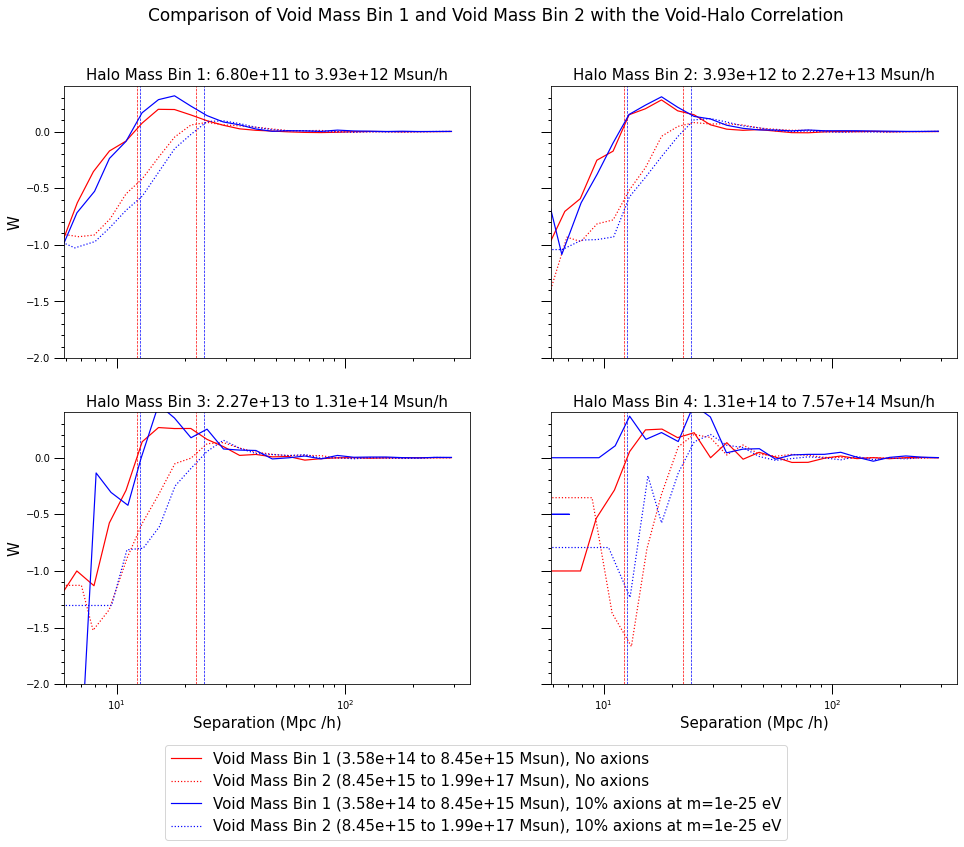

In [21]:
#Plot the data in a log-log plot
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

#HALO MASS BIN 1
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_voidhalo_HaloMass1_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), No axions", lw=1.2, ls='solid', color='red')
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass2[4]['r'],corr_voidhalo_HaloMass1_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), No axions", lw=1.2, ls='dotted', color='red')

axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='solid', color='blue')
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='dotted', color='blue')


#HALO MASS BIN 2
axs[0, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), No axions", lw=1.2, ls='solid', color='red')
axs[0, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass2[4]['r'],corr_voidhalo_HaloMass2_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), No axions", lw=1.2, ls='dotted', color='red')

axs[0, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='solid', color='blue')
axs[0, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='dotted', color='blue')


#HALO MASS BIN 3
axs[1, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass1[4]['r'],corr_voidhalo_HaloMass3_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), No axions", lw=1.2, ls='solid', color='red')
axs[1, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass2[4]['r'],corr_voidhalo_HaloMass3_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), No axions", lw=1.2, ls='dotted', color='red')

axs[1, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='solid', color='blue')
axs[1, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='dotted', color='blue')


#HALO MASS BIN 4
axs[1, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass1[4]['r'],corr_voidhalo_HaloMass4_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), No axions", lw=1.2, ls='solid', color='red')
axs[1, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass2[4]['r'],corr_voidhalo_HaloMass4_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), No axions", lw=1.2, ls='dotted', color='red')

axs[1, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='solid', color='blue')
axs[1, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 10% axions at m=1e-25 eV", lw=1.2, ls='dotted', color='blue')


#TITLES
axs[0, 0].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h', fontsize=15)
axs[0, 1].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h', fontsize=15)
axs[1, 0].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h', fontsize=15)
axs[1, 1].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h', fontsize=15)


axs[1,1].legend(loc="lower right", fontsize=15, bbox_to_anchor=(0.6, -0.6))


#plt.axhline(y=0)
#yerr=1/(W_nbdkt[0]['npairs']**0.5)
#yerr=1/(W_nbdkt_axion[0]['npairs']**0.5

#plt.xscale('log')
#plt.

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
#plt.xlabel("Seperation (Mpc /h)", fontsize=20)
#plt.ylabel("W", fontsize=20)


for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_ylim(-2,0.4)
    ax.set_facecolor('white')
    
    #HORIZONTAL AND VERTICAL LINES
    ax.axvline(x=12.26283681347605, ls='dashed', color='red', lw=0.7)
    ax.axvline(x=12.635481948673336, ls='dashed', color='blue', lw=0.7)
    ax.axvline(x=22.243157436562328, ls='dashed', color='red', lw=0.7)
    ax.axvline(x=24.1819449689155, ls='dashed', color='blue', lw=0.7)
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Void Mass Bin 1 and Void Mass Bin 2 with the Void-Halo Correlation',fontsize=17)

Text(0.5, 0.98, 'Comparison of Various Halo Mass Bins with the Void-Halo Correlation, No Axions')

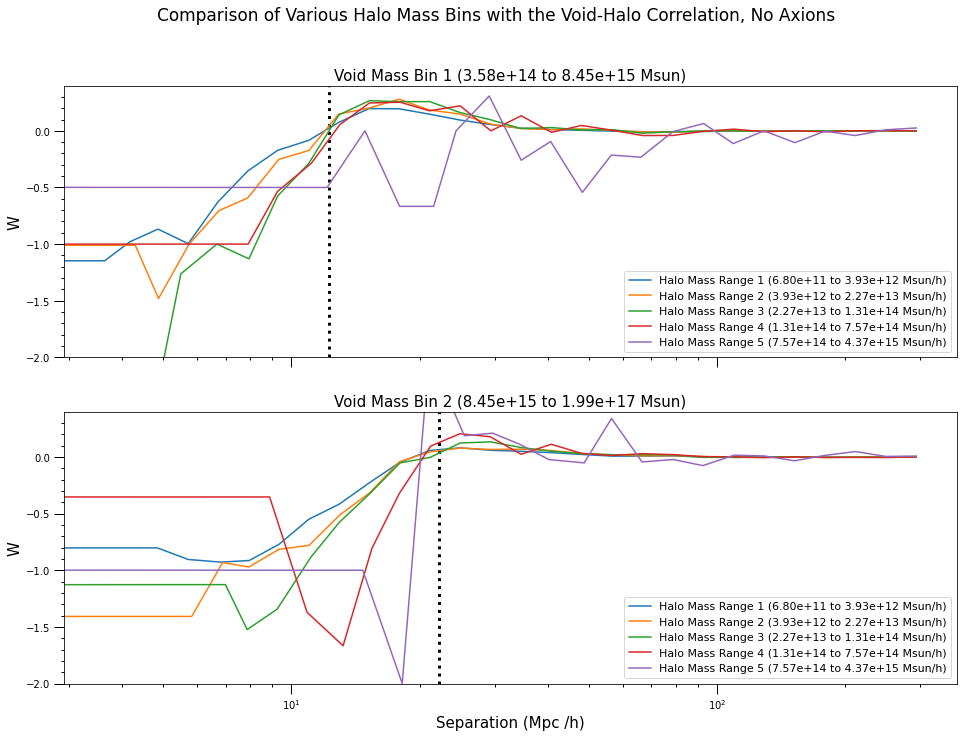

In [10]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

axs[0].errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_voidhalo_HaloMass1_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass3_VoidMass1[4]['r'],corr_voidhalo_HaloMass3_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass4_VoidMass1[4]['r'],corr_voidhalo_HaloMass4_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass5_VoidMass1[4]['r'],corr_voidhalo_HaloMass5_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", lw=1.5, ls='solid')

axs[1].errorbar(corr_voidhalo_HaloMass1_VoidMass2[4]['r'],corr_voidhalo_HaloMass1_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass2_VoidMass2[4]['r'],corr_voidhalo_HaloMass2_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass3_VoidMass2[4]['r'],corr_voidhalo_HaloMass3_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass4_VoidMass2[4]['r'],corr_voidhalo_HaloMass4_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass5_VoidMass2[4]['r'],corr_voidhalo_HaloMass5_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", lw=1.5, ls='solid')

axs[0].set_title('Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun)', fontsize=15)
axs[1].set_title('Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun)', fontsize=15)

axs[0].axvline(x=12.26283681347605, ls='dotted', color='black', lw=3)
axs[1].axvline(x=22.243157436562328, ls='dotted', color='black', lw=3)



for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_ylim(-2,0.4)
    ax.legend(loc="lower right", fontsize=11)
    ax.set_facecolor('white')
    
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Various Halo Mass Bins with the Void-Halo Correlation, No Axions',fontsize=17)

Text(0.5, 0.98, 'Comparison of Various Halo Mass Bins with the Void-Halo Correlation, 10% axions at m=1e-25 eV')

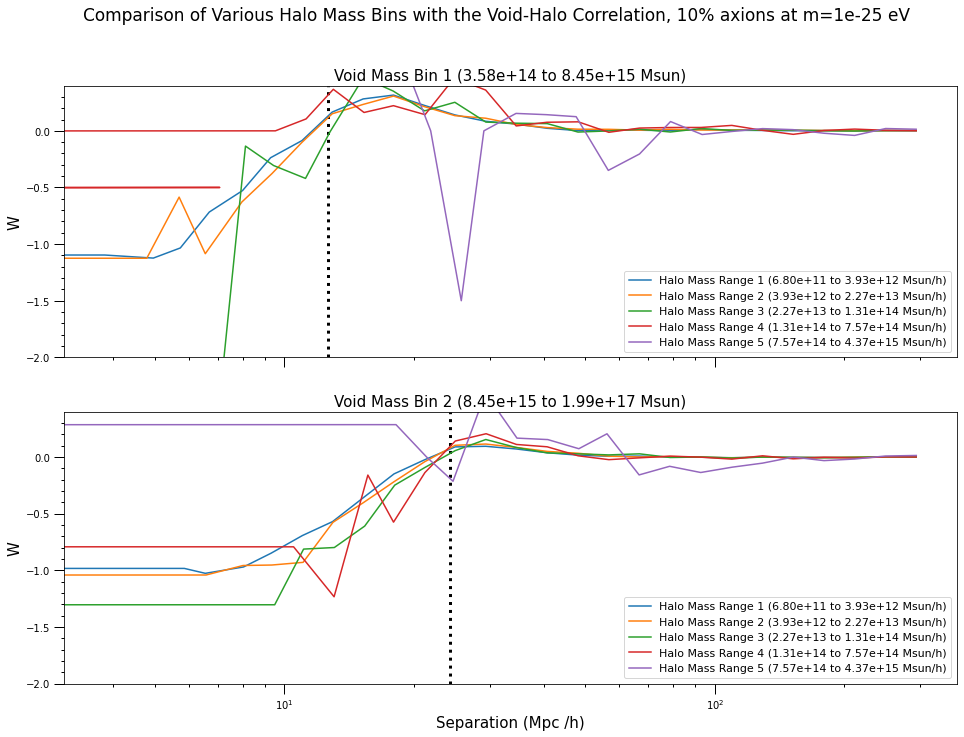

In [47]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

axs[0].errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", lw=1.5, ls='solid')
axs[0].errorbar(corr_voidhalo_HaloMass5_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass5_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", lw=1.5, ls='solid')

axs[1].errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", lw=1.5, ls='solid')
axs[1].errorbar(corr_voidhalo_HaloMass5_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass5_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", lw=1.5, ls='solid')

axs[0].set_title('Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun)', fontsize=15)
axs[1].set_title('Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun)', fontsize=15)

axs[0].axvline(x=12.635481948673336, ls='dotted', color='black', lw=3)
axs[1].axvline(x=24.1819449689155, ls='dotted', color='black', lw=3)



for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_ylim(-2,0.4)
    ax.legend(loc="lower right", fontsize=11)
    ax.set_facecolor('white')
    
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Various Halo Mass Bins with the Void-Halo Correlation, 10% axions at m=1e-25 eV',fontsize=17)

Text(0.5, 0.98, 'Comparison of Halo Simulation Resolutions with the Void-Halo Correlation')

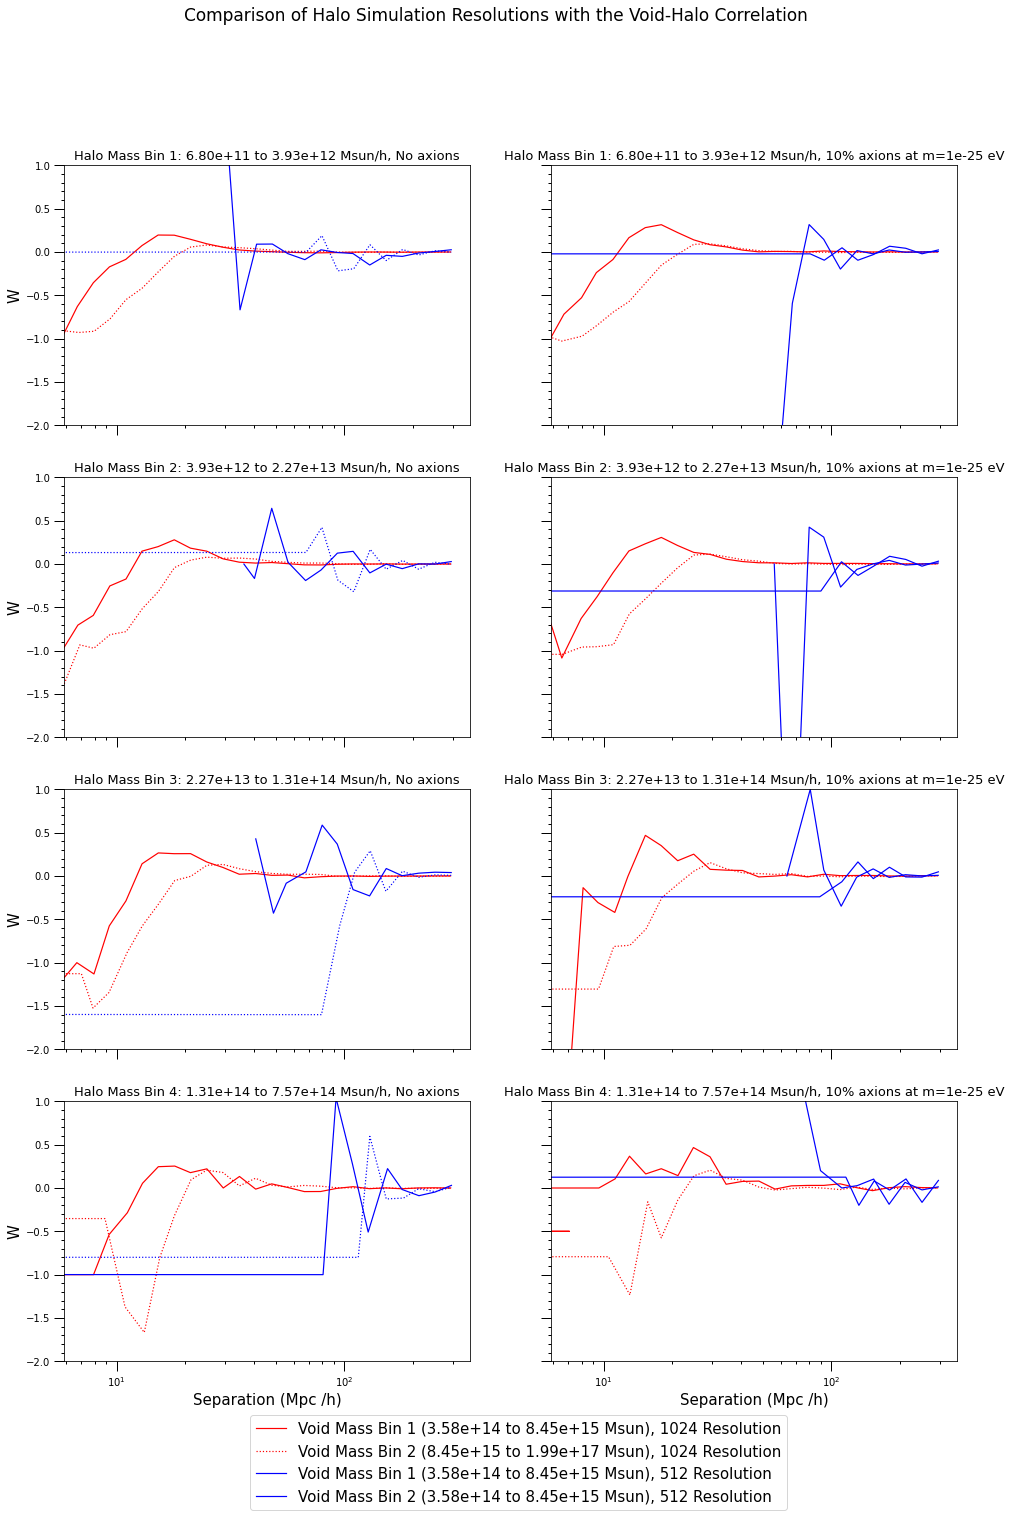

In [20]:
#Plot the data in a log-log plot
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(16,22), facecolor="w")

#HALO MASS BIN 1, NO AXIONS
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_voidhalo_HaloMass1_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass2[4]['r'],corr_voidhalo_HaloMass1_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass1_512res[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[0, 0].errorbar(corr_voidhalo_HaloMass1_VoidMass2_512res[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 512 Resolution", lw=1.2, ls='dotted', color='blue')


#HALO MASS BIN 2, NO AXIONS
axs[1, 0].errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[1, 0].errorbar(corr_voidhalo_HaloMass2_VoidMass2[4]['r'],corr_voidhalo_HaloMass2_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[1, 0].errorbar(corr_voidhalo_HaloMass2_VoidMass1_512res[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[1, 0].errorbar(corr_voidhalo_HaloMass2_VoidMass2_512res[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 512 Resolution", lw=1.2, ls='dotted', color='blue')

#HALO MASS BIN 3, NO AXIONS
axs[2, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass1[4]['r'],corr_voidhalo_HaloMass3_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[2, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass2[4]['r'],corr_voidhalo_HaloMass3_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[2, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass1_512res[4]['r'],corr_voidhalo_HaloMass3_VoidMass1_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[2, 0].errorbar(corr_voidhalo_HaloMass3_VoidMass2_512res[4]['r'],corr_voidhalo_HaloMass3_VoidMass2_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 512 Resolution", lw=1.2, ls='dotted', color='blue')

#HALO MASS BIN 4, NO AXIONS
axs[3, 0].errorbar(corr_voidhalo_HaloMass4_VoidMass1[4]['r'],corr_voidhalo_HaloMass4_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[3, 0].errorbar(corr_voidhalo_HaloMass4_VoidMass2[4]['r'],corr_voidhalo_HaloMass4_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[3, 0].errorbar(corr_voidhalo_HaloMass4_VoidMass1_512res[4]['r'],corr_voidhalo_HaloMass4_VoidMass1_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[3, 0].errorbar(corr_voidhalo_HaloMass4_VoidMass2_512res[4]['r'],corr_voidhalo_HaloMass4_VoidMass2_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 512 Resolution", lw=1.2, ls='dotted', color='blue')

#HALO MASS BIN 1, WITH AXIONS
axs[0, 1].errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[0, 1].errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[0, 1].errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[0, 1].errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')


#HALO MASS BIN 2, WITH AXIONS
axs[1, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[1, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[1, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[1, 1].errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')


#HALO MASS BIN 3, WITH AXIONS
axs[2, 1].errorbar(corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[2, 1].errorbar(corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass3_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[2, 1].errorbar(corr_voidhalo_HaloMass3_VoidMass1_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass3_VoidMass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[2, 1].errorbar(corr_voidhalo_HaloMass3_VoidMass2_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass3_VoidMass2_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')


#HALO MASS BIN 4, WITH AXIONS
axs[3, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 1024 Resolution", lw=1.2, ls='solid', color='red')
axs[3, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass4_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (8.45e+15 to 1.99e+17 Msun), 1024 Resolution", lw=1.2, ls='dotted', color='red')
axs[3, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass1_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass4_VoidMass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 1 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')
axs[3, 1].errorbar(corr_voidhalo_HaloMass4_VoidMass2_1_25_10_512res[4]['r'],corr_voidhalo_HaloMass4_VoidMass2_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="Void Mass Bin 2 (3.58e+14 to 8.45e+15 Msun), 512 Resolution", lw=1.2, ls='solid', color='blue')


#TITLES
#NO AXIONS
axs[0, 0].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h, No axions', fontsize=13)
axs[1, 0].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h, No axions', fontsize=13)
axs[2, 0].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h, No axions', fontsize=13)
axs[3, 0].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h, No axions', fontsize=13)

#AXIONS
axs[0, 1].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h, 10% axions at m=1e-25 eV', fontsize=13)
axs[1, 1].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h, 10% axions at m=1e-25 eV', fontsize=13)
axs[2, 1].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h, 10% axions at m=1e-25 eV', fontsize=13)
axs[3, 1].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h, 10% axions at m=1e-25 eV', fontsize=13)


axs[3,1].legend(loc="lower right", fontsize=15, bbox_to_anchor=(0.6, -0.6))


#plt.axhline(y=0)
#yerr=1/(W_nbdkt[0]['npairs']**0.5)
#yerr=1/(W_nbdkt_axion[0]['npairs']**0.5

#plt.xscale('log')
#plt.

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
#plt.xlabel("Seperation (Mpc /h)", fontsize=20)
#plt.ylabel("W", fontsize=20)


for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_ylim(-2,1)
    ax.set_facecolor('white')
    
    #HORIZONTAL AND VERTICAL LINES
    #ax.axvline(x=12.26283681347605, ls='dashed', color='red', lw=0.7)
    #ax.axvline(x=12.635481948673336, ls='dashed', color='blue', lw=0.7)
    #ax.axvline(x=22.243157436562328, ls='dashed', color='red', lw=0.7)
    #ax.axvline(x=24.1819449689155, ls='dashed', color='blue', lw=0.7)
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Halo Simulation Resolutions with the Void-Halo Correlation',fontsize=17)

In [41]:
print(corr_voidhalo_HaloLargeMassBin1_VoidMass1_1_25_10[4]['corr'])

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan  1.00000000e+00             nan             nan
  0.00000000e+00 -2.00000000e+00             nan -1.00000000e+00
 -4.28571429e-01 -2.00000000e+00 -3.57142857e-01 -9.37500000e-01
 -9.66666667e-01 -1.63157895e+00 -8.42857143e-01 -1.04237288e+00
 -9.74489796e-01 -5.80174927e-01 -5.71955720e-01 -1.93979933e-01
 -1.04336043e-01  1.36440678e-01  2.58500000e-01  3.09812042e-01
  2.30544747e-01  1.48901163e-01  1.01229392e-01  6.15354262e-02
  2.71089613e-02  4.34949993e-03  3.49394167e-03  5.96374480e-03
  3.00926605e-03  1.26207666e-02  9.36749373e-03  3.62136413e-03
  1.29708609e-03  2.80851326e-03  3.82141786e-04  9.85112006e-04
  1.06922603e-03]


<h1>HALO-HALO CORRELATION</h1>

In [18]:
histogram_bins_3d = np.logspace(-1,2.5)

#corr_halohalo_Mass1 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1, HaloMassBin1, HaloMassBin1_Random, HaloMassBin1_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass2 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2, HaloMassBin2, HaloMassBin2_Random, HaloMassBin2_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_halohalo_Mass3 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3, HaloMassBin3, HaloMassBin3_Random, HaloMassBin3_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_halohalo_Mass4 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4, HaloMassBin4, HaloMassBin4_Random, HaloMassBin4_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
corr_halohalo_Mass5 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5, HaloMassBin5, HaloMassBin5_Random, HaloMassBin5_Random, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_halohalo_Mass1_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10, HaloMassBin1_1_25_10, HaloMassBin1_Random_1_25_10, HaloMassBin1_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass2_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10, HaloMassBin2_1_25_10, HaloMassBin2_Random_1_25_10, HaloMassBin2_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass3_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10, HaloMassBin3_1_25_10, HaloMassBin3_Random_1_25_10, HaloMassBin3_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass4_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10, HaloMassBin4_1_25_10, HaloMassBin4_Random_1_25_10, HaloMassBin4_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass5_1_25_10 = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10, HaloMassBin5_1_25_10, HaloMassBin5_Random_1_25_10, HaloMassBin5_Random_1_25_10, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_halohalo_Mass1_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_512res, HaloMassBin1_512res, HaloMassBin1_Random_512res, HaloMassBin1_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass2_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_512res, HaloMassBin2_512res, HaloMassBin2_Random_512res, HaloMassBin2_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass3_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_512res, HaloMassBin3_512res, HaloMassBin3_Random_512res, HaloMassBin3_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass4_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_512res, HaloMassBin4_512res, HaloMassBin4_Random_512res, HaloMassBin4_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass5_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_512res, HaloMassBin5_512res, HaloMassBin5_Random_512res, HaloMassBin5_Random_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

#corr_halohalo_Mass1_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin1_1_25_10_512res, HaloMassBin1_1_25_10_512res, HaloMassBin1_Random_1_25_10_512res, HaloMassBin1_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass2_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin2_1_25_10_512res, HaloMassBin2_1_25_10_512res, HaloMassBin2_Random_1_25_10_512res, HaloMassBin2_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass3_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin3_1_25_10_512res, HaloMassBin3_1_25_10_512res, HaloMassBin3_Random_1_25_10_512res, HaloMassBin3_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass4_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin4_1_25_10_512res, HaloMassBin4_1_25_10_512res, HaloMassBin4_Random_1_25_10_512res, HaloMassBin4_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)
#corr_halohalo_Mass5_1_25_10_512res = LandySzalayEstimator(SimulationBoxPairCount, HaloMassBin5_1_25_10_512res, HaloMassBin5_1_25_10_512res, HaloMassBin5_Random_1_25_10_512res, HaloMassBin5_Random_1_25_10_512res, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=696.32, periodic=False, show_progress=True)

/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms a

In [166]:
#np.save("halohalocorr mass 1 no axion", corr_halohalo_Mass1[4]['corr'])
#np.save("halohalocorr mass 1 1 25 10", corr_halohalo_Mass1_1_25_10[4]['corr'])

np.save("halohalocorr mass 2 no axion", corr_halohalo_Mass2[4]['corr'])
np.save("halohalocorr mass 2 1 25 10", corr_halohalo_Mass2_1_25_10[4]['corr'])

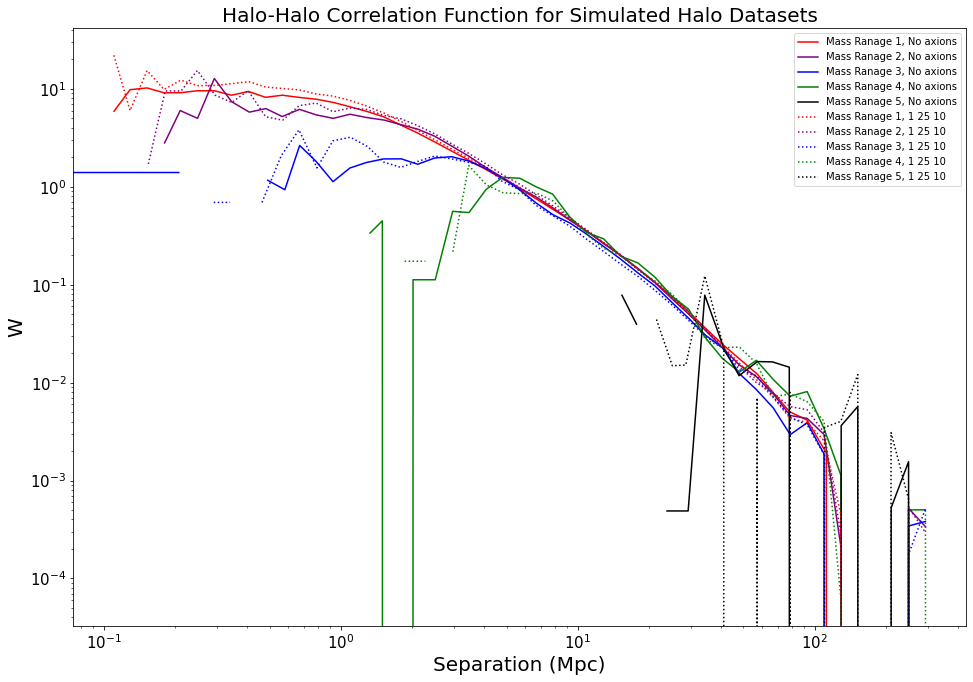

In [13]:
#Plot the data in a log-log plot
plt.figure(figsize=(16,11))

#plt.plot(W_nbdkt[4]['r'],W_nbdkt[4]['corr'])

plt.errorbar(corr_halohalo_Mass1[4]['r'],corr_halohalo_Mass1[4]['corr']*1.5, ecolor="purple",capsize=5, label="Mass Ranage 1, No axions", ls='solid', color='red')
plt.errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="Mass Ranage 2, No axions", ls='solid', color='purple')
plt.errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="Mass Ranage 3, No axions", ls='solid', color='blue')
plt.errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="Mass Ranage 4, No axions", ls='solid', color='green')
plt.errorbar(corr_halohalo_Mass5[4]['r'],corr_halohalo_Mass5[4]['corr']/25.70483765579978, ecolor="purple",capsize=5, label="Mass Ranage 5, No axions", ls='solid', color='black')

plt.errorbar(corr_halohalo_Mass1_1_25_10[4]['r'],corr_halohalo_Mass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Mass Ranage 1, 1 25 10", ls='dotted', color='red')
plt.errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="Mass Ranage 2, 1 25 10", ls='dotted', color='purple')
plt.errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="Mass Ranage 3, 1 25 10", ls='dotted', color='blue')
plt.errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="Mass Ranage 4, 1 25 10", ls='dotted', color='green')
plt.errorbar(corr_halohalo_Mass5_1_25_10[4]['r'],corr_halohalo_Mass5_1_25_10[4]['corr']/22.8210868344539, ecolor="purple",capsize=5, label="Mass Ranage 5, 1 25 10", ls='dotted', color='black')


#yerr=1/(W_nbdkt[0]['npairs']**0.5)
#yerr=1/(W_nbdkt_axion[0]['npairs']**0.5
        
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="upper right", fontsize=10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
plt.title("Halo-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.xlabel("Separation (Mpc)", fontsize=20)
plt.ylabel("W", fontsize=20)
plt.show()

In [93]:
print(corr_halohalo_Mass5[4]['corr'][36]/corr_halohalo_Mass2[4]['corr'][36])
print(corr_halohalo_Mass4[4]['corr'][36]/corr_halohalo_Mass2[4]['corr'][36])
print(corr_halohalo_Mass3[4]['corr'][36]/corr_halohalo_Mass2[4]['corr'][36])
print(corr_halohalo_Mass2[4]['corr'][36]/corr_halohalo_Mass2[4]['corr'][36])


#print(corr_halohalo_Mass5_1_25_10[4]['r'][35])

25.70483765579978
3.4566097732645096
2.1446785087900464
1.0


Text(0.5, 0.98, 'Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Adjusted for Bias')

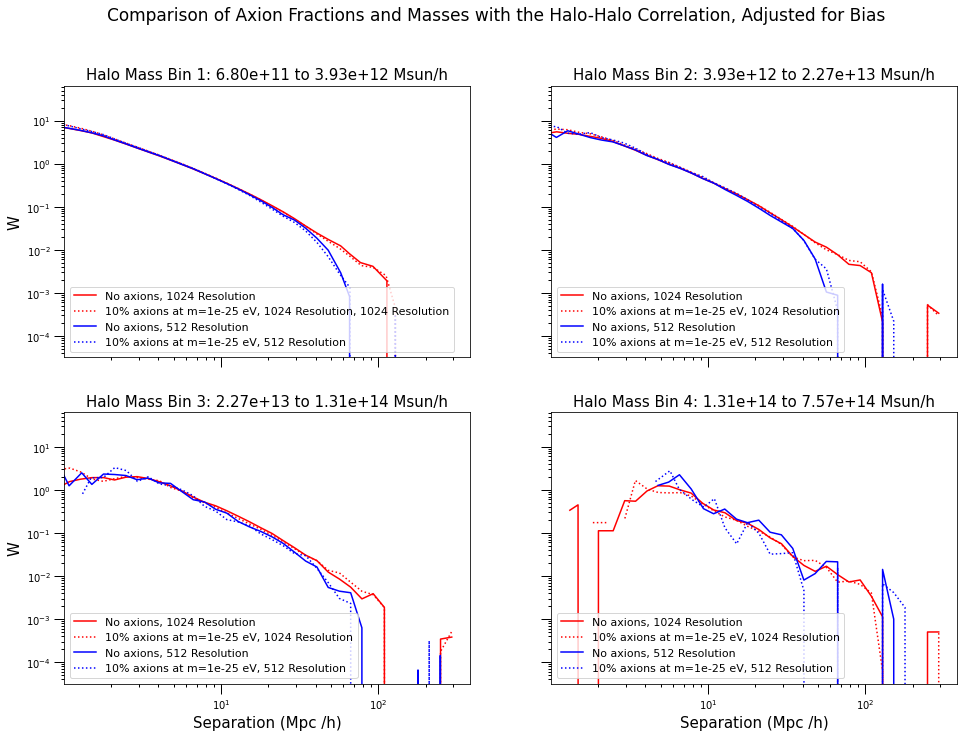

In [40]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

corr_halohalo_Mass1=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')


#1024 RES, NO AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1*1.5, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')

#1024 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution, 1024 Resolution", ls='dotted', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')

#512 RES, NO AXIONS



#512 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1_512res[4]['corr']*1.5, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_512res[4]['r'],corr_halohalo_Mass2_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_512res[4]['r'],corr_halohalo_Mass3_512res[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_512res[4]['r'],corr_halohalo_Mass4_512res[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')

axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10_512res[4]['r'],corr_halohalo_Mass2_1_25_10_512res[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10_512res[4]['r'],corr_halohalo_Mass3_1_25_10_512res[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10_512res[4]['r'],corr_halohalo_Mass4_1_25_10_512res[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')



axs[0, 0].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h', fontsize=15)
axs[0, 1].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h', fontsize=15)
axs[1, 0].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h', fontsize=15)
axs[1, 1].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h', fontsize=15)

for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    #ax.set_ylim(-2,0.4)
    ax.legend(loc="lower left", fontsize=11)
    ax.set_facecolor('white')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Adjusted for Bias',fontsize=17)

Text(0.5, 0.98, 'Comparison of Various Halo Mass Bins with the Halo-Halo Correlation, Adjusted for Bias')

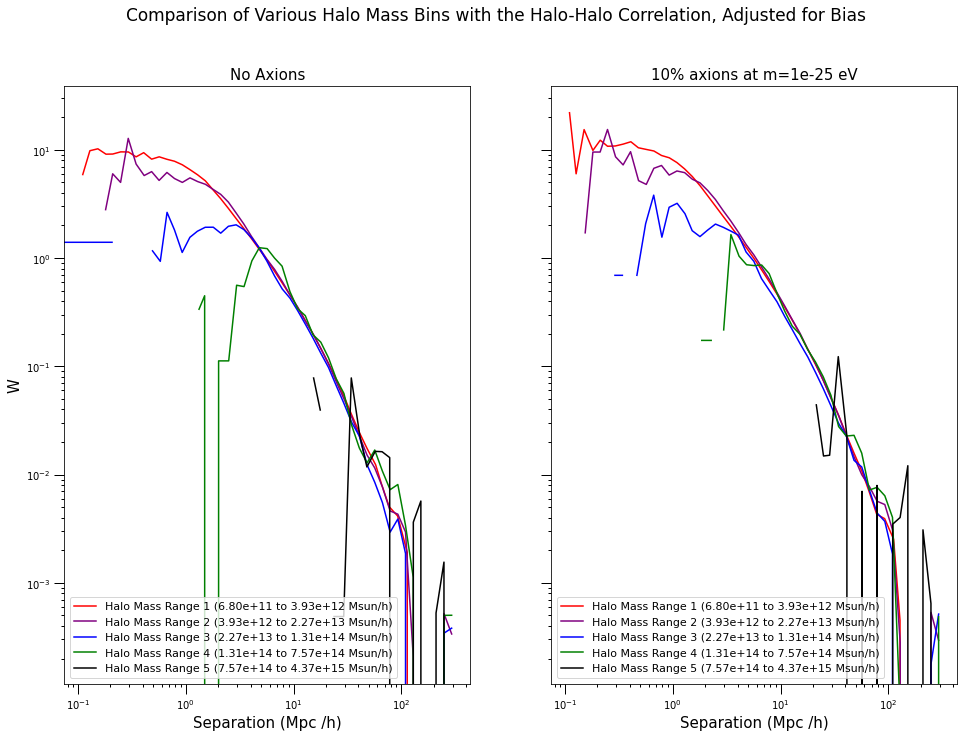

In [43]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

axs[0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1*1.5, ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", ls='solid', color='red')
axs[0].errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", ls='solid', color='purple')
axs[0].errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", ls='solid', color='blue')
axs[0].errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", ls='solid', color='green')
axs[0].errorbar(corr_halohalo_Mass5[4]['r'],corr_halohalo_Mass5[4]['corr']/25.70483765579978, ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", ls='solid', color='black')

axs[1].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", ls='solid', color='red')
axs[1].errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", ls='solid', color='purple')
axs[1].errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", ls='solid', color='blue')
axs[1].errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", ls='solid', color='green')
axs[1].errorbar(corr_halohalo_Mass5_1_25_10[4]['r'],corr_halohalo_Mass5_1_25_10[4]['corr']/22.8210868344539, ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", ls='solid', color='black')


axs[0].set_title('No Axions', fontsize=15)
axs[1].set_title('10% axions at m=1e-25 eV', fontsize=15)

for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    #ax.set_ylim(-2,0.4)
    ax.legend(loc="lower left", fontsize=11)
    ax.set_facecolor('white')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Various Halo Mass Bins with the Halo-Halo Correlation, Adjusted for Bias',fontsize=17)

Text(0.5, 0.98, 'Comparison of Various Halo Mass Bins with the Halo-Halo Correlation, Not Adjusted for Bias')

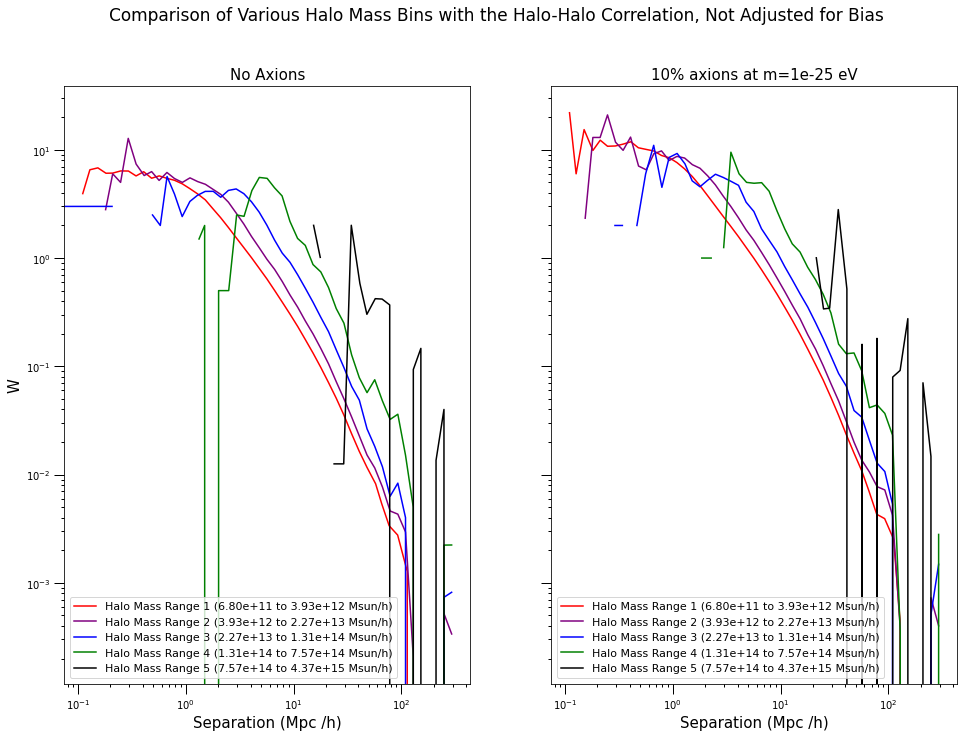

In [44]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

axs[0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1, ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", ls='solid', color='red')
axs[0].errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", ls='solid', color='purple')
axs[0].errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", ls='solid', color='blue')
axs[0].errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", ls='solid', color='green')
axs[0].errorbar(corr_halohalo_Mass5[4]['r'],corr_halohalo_Mass5[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", ls='solid', color='black')

axs[1].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="Halo Mass Range 1 (6.80e+11 to 3.93e+12 Msun/h)", ls='solid', color='red')
axs[1].errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 2 (3.93e+12 to 2.27e+13 Msun/h)", ls='solid', color='purple')
axs[1].errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 3 (2.27e+13 to 1.31e+14 Msun/h)", ls='solid', color='blue')
axs[1].errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 4 (1.31e+14 to 7.57e+14 Msun/h)", ls='solid', color='green')
axs[1].errorbar(corr_halohalo_Mass5_1_25_10[4]['r'],corr_halohalo_Mass5_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Halo Mass Range 5 (7.57e+14 to 4.37e+15 Msun/h)", ls='solid', color='black')


axs[0].set_title('No Axions', fontsize=15)
axs[1].set_title('10% axions at m=1e-25 eV', fontsize=15)

for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    #ax.set_ylim(-2,0.4)
    ax.legend(loc="lower left", fontsize=11)
    ax.set_facecolor('white')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Various Halo Mass Bins with the Halo-Halo Correlation, Not Adjusted for Bias',fontsize=17)

Text(0.5, 0.98, 'Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Not Adjusted for Bias')

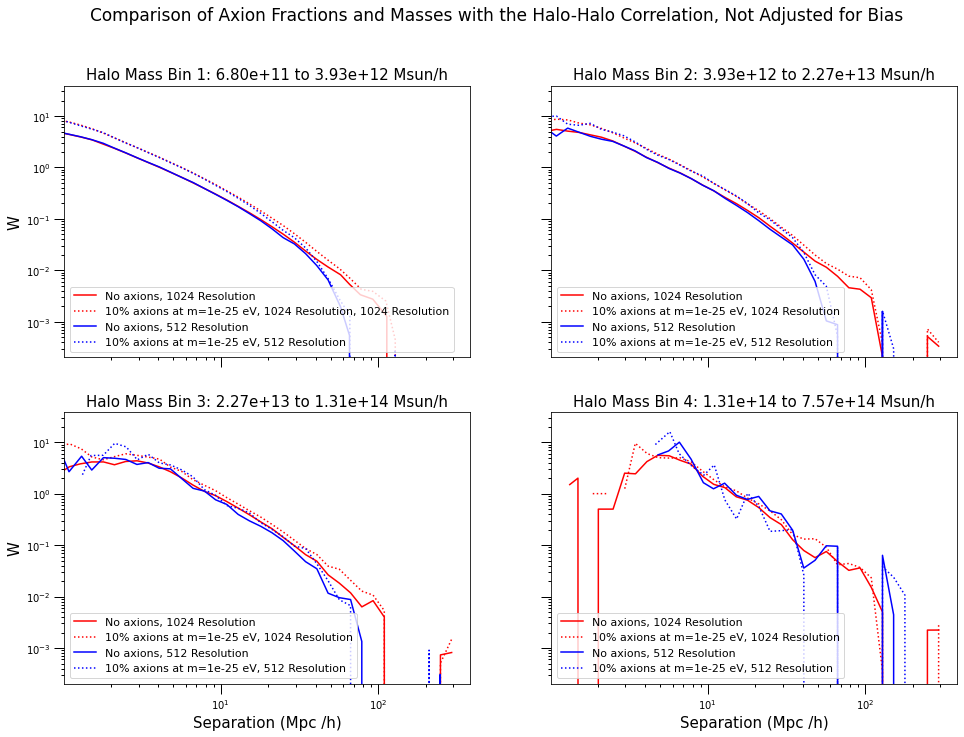

In [45]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

corr_halohalo_Mass1=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')


#1024 RES, NO AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr'], ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr'], ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')

#1024 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution, 1024 Resolution", ls='dotted', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')

#512 RES, NO AXIONS



#512 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_512res[4]['r'],corr_halohalo_Mass2_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_512res[4]['r'],corr_halohalo_Mass3_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_512res[4]['r'],corr_halohalo_Mass4_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')

axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10_512res[4]['r'],corr_halohalo_Mass2_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10_512res[4]['r'],corr_halohalo_Mass3_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10_512res[4]['r'],corr_halohalo_Mass4_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')



axs[0, 0].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h', fontsize=15)
axs[0, 1].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h', fontsize=15)
axs[1, 0].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h', fontsize=15)
axs[1, 1].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h', fontsize=15)

for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    #ax.set_ylim(-2,0.4)
    ax.legend(loc="lower left", fontsize=11)
    ax.set_facecolor('white')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Not Adjusted for Bias',fontsize=17)

Text(0.5, 0.98, 'Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Adjusted for Bias, On Small Scales')

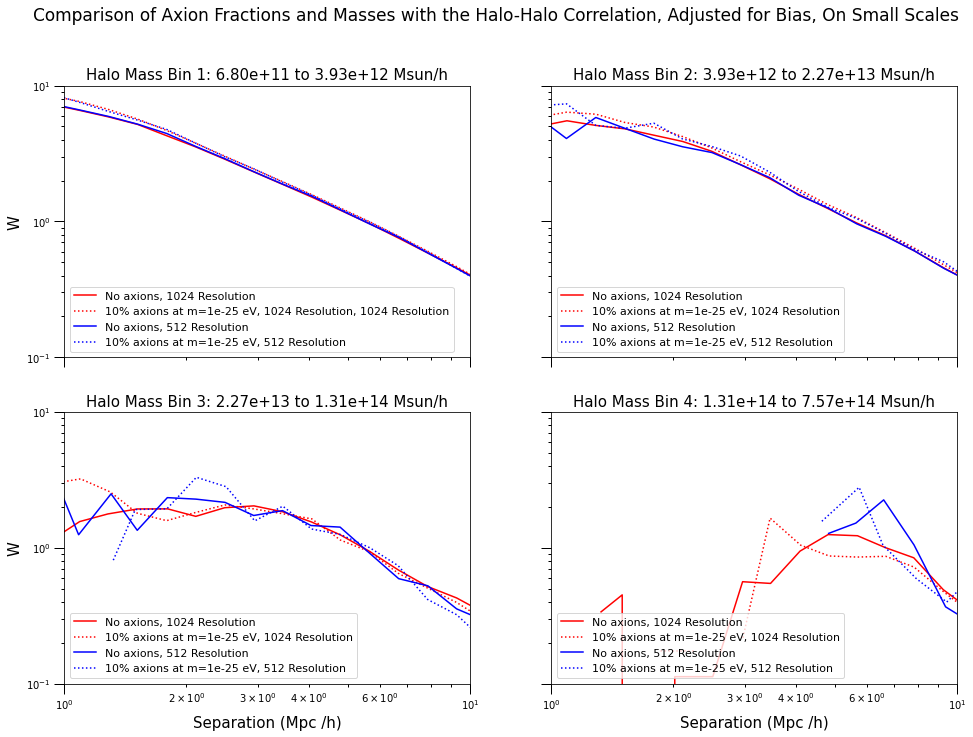

In [46]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,11), facecolor="w")

corr_halohalo_Mass1=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')


#1024 RES, NO AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1*1.5, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3[4]['r'],corr_halohalo_Mass3[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4[4]['r'],corr_halohalo_Mass4[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="No axions, 1024 Resolution", ls='solid', color='red')

#1024 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution, 1024 Resolution", ls='dotted', color='red')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10[4]['r'],corr_halohalo_Mass3_1_25_10[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10[4]['r'],corr_halohalo_Mass4_1_25_10[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 1024 Resolution", ls='dotted', color='red')

#512 RES, NO AXIONS



#512 RES, WITH AXIONS
axs[0, 0].errorbar(corr_halohalo_Mass1_512res[4]['r'],corr_halohalo_Mass1_512res[4]['corr']*1.5, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_512res[4]['r'],corr_halohalo_Mass2_512res[4]['corr'], ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_512res[4]['r'],corr_halohalo_Mass3_512res[4]['corr']/2.1446785087900464, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_512res[4]['r'],corr_halohalo_Mass4_512res[4]['corr']/4.4566097732645096, ecolor="purple",capsize=5, label="No axions, 512 Resolution", ls='solid', color='blue')

axs[0, 0].errorbar(corr_halohalo_Mass1_1_25_10_512res[4]['r'],corr_halohalo_Mass1_1_25_10_512res[4]['corr'], ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[0, 1].errorbar(corr_halohalo_Mass2_1_25_10_512res[4]['r'],corr_halohalo_Mass2_1_25_10_512res[4]['corr']/1.363702034680026, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 0].errorbar(corr_halohalo_Mass3_1_25_10_512res[4]['r'],corr_halohalo_Mass3_1_25_10_512res[4]['corr']/2.886438352461092, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')
axs[1, 1].errorbar(corr_halohalo_Mass4_1_25_10_512res[4]['r'],corr_halohalo_Mass4_1_25_10_512res[4]['corr']/5.762610450155854, ecolor="purple",capsize=5, label="10% axions at m=1e-25 eV, 512 Resolution", ls='dotted', color='blue')



axs[0, 0].set_title('Halo Mass Bin 1: 6.80e+11 to 3.93e+12 Msun/h', fontsize=15)
axs[0, 1].set_title('Halo Mass Bin 2: 3.93e+12 to 2.27e+13 Msun/h', fontsize=15)
axs[1, 0].set_title('Halo Mass Bin 3: 2.27e+13 to 1.31e+14 Msun/h', fontsize=15)
axs[1, 1].set_title('Halo Mass Bin 4: 1.31e+14 to 7.57e+14 Msun/h', fontsize=15)

for ax in axs.flat:
    ax.minorticks_on()
    ax.tick_params('both', length=3, width=1, which='minor')
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlabel(xlabel="Separation (Mpc /h)", fontsize=15)
    ax.set_ylabel(ylabel="W", fontsize=15)
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    #ax.set_ylim(-2,0.4)
    ax.legend(loc="lower left", fontsize=11)
    ax.set_facecolor('white')
    ax.set_xlim(1,10)
    ax.set_ylim(0.1,10)
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle('Comparison of Axion Fractions and Masses with the Halo-Halo Correlation, Adjusted for Bias, On Small Scales',fontsize=17)

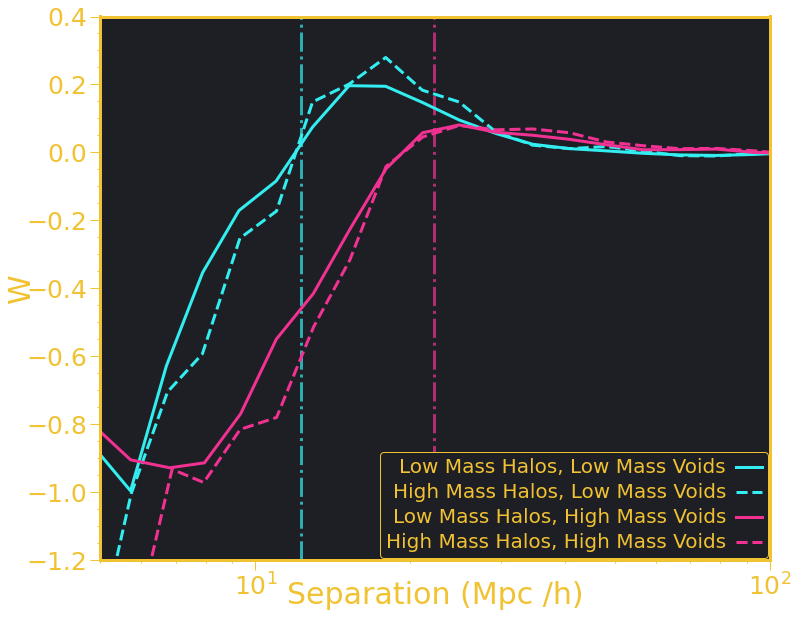

In [217]:
plt.figure(figsize=(12,10))
plt.rcParams['axes.facecolor'] = '#1E1F24'
plt.rcParams["axes.edgecolor"] = "#F1C232"
plt.rcParams["axes.linewidth"] = 3

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_voidhalo_HaloMass1_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, Low Mass Voids", lw=3, ls='solid', color='#32eef1')
plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, Low Mass Voids", lw=3, ls='dashed', color='#32eef1')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass2[4]['r'],corr_voidhalo_HaloMass1_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, High Mass Voids", lw=3, ls='solid', color='#f13292')
plt.errorbar(corr_voidhalo_HaloMass2_VoidMass2[4]['r'],corr_voidhalo_HaloMass2_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, High Mass Voids", lw=3, ls='dashed', color='#f13292')

#plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, Low Mass Voids, With Axions", lw=3, ls='solid', color='#f16232')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, Low Mass Voids, With Axions", lw=3, ls='dashed', color='#f16232')

#plt.errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, High Mass Voids, With Axions", lw=3, ls='solid', color='#92f132')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, High Mass Voids, With Axions", lw=3, ls='dashed', color='#92f132')

plt.xscale('log')
plt.legend(loc="lower right", fontsize=20, labelcolor="#F1C232", frameon=True, framealpha=1, edgecolor="#F1C232", markerfirst=False, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(x=12.26283681347605, ls='-.', color='#32eef1', lw=3, alpha=0.7)
#plt.axvline(x=12.635481948673336, ls='-.', color='#f16232', lw=3, alpha=0.7)
plt.axvline(x=22.243157436562328, ls='-.', color='#f13292', lw=3, alpha=0.7)
#plt.axvline(x=24.1819449689155, ls='-.', color='#92f132', lw=3, alpha=0.7)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor', color="#F1C232", labelcolor="#F1C232")
plt.tick_params('both', length=10, width=1, which='major', labelcolor="#F1C232", color="#F1C232")
plt.xlabel("Separation (Mpc /h)", size=30, color="#F1C232", labelpad=-20)
plt.ylabel("W", fontsize=30, color="#F1C232", labelpad=-10)
plt.xscale('log')
plt.ylim(-1.2,0.4)
plt.xlim(5,10**2)
#plt.set_facecolor("black")

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.show()

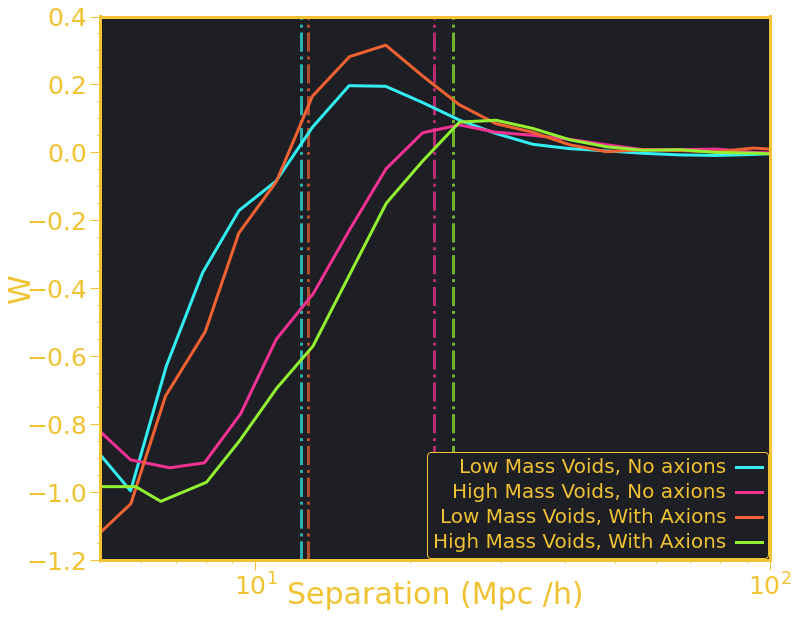

In [218]:
plt.figure(figsize=(12,10))
plt.rcParams['axes.facecolor'] = '#1E1F24'
plt.rcParams["axes.edgecolor"] = "#F1C232"
plt.rcParams["axes.linewidth"] = 3

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_voidhalo_HaloMass1_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid', color='#32eef1')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, Low Mass Voids, No axions", lw=3, ls='dashed', color='#32eef1')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass2[4]['r'],corr_voidhalo_HaloMass1_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="High Mass Voids, No axions", lw=3, ls='solid', color='#f13292')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass2[4]['r'],corr_voidhalo_HaloMass2_VoidMass2[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, High Mass Voids, No axions", lw=3, ls='dashed', color='#f13292')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Voids, With Axions", lw=3, ls='solid', color='#f16232')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass1_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, Low Mass Voids, With Axions", lw=3, ls='dashed', color='#f16232')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass1_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Voids, With Axions", lw=3, ls='solid', color='#92f132')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['r'],corr_voidhalo_HaloMass2_VoidMass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, High Mass Voids, With Axions", lw=3, ls='dashed', color='#92f132')

plt.xscale('log')
plt.legend(loc="lower right", fontsize=20, labelcolor="#F1C232", frameon=True, framealpha=1, edgecolor="#F1C232", markerfirst=False, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.axvline(x=12.26283681347605, ls='-.', color='#32eef1', lw=3, alpha=0.7)
plt.axvline(x=12.635481948673336, ls='-.', color='#f16232', lw=3, alpha=0.7)
plt.axvline(x=22.243157436562328, ls='-.', color='#f13292', lw=3, alpha=0.7)
plt.axvline(x=24.1819449689155, ls='-.', color='#92f132', lw=3, alpha=0.7)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor', color="#F1C232", labelcolor="#F1C232")
plt.tick_params('both', length=10, width=1, which='major', labelcolor="#F1C232", color="#F1C232")
plt.xlabel("Separation (Mpc /h)", size=30, color="#F1C232", labelpad=-20)
plt.ylabel("W", fontsize=30, color="#F1C232", labelpad=-10)
plt.xscale('log')
plt.ylim(-1.2,0.4)
plt.xlim(5,10**2)
#plt.set_facecolor("black")

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.show()

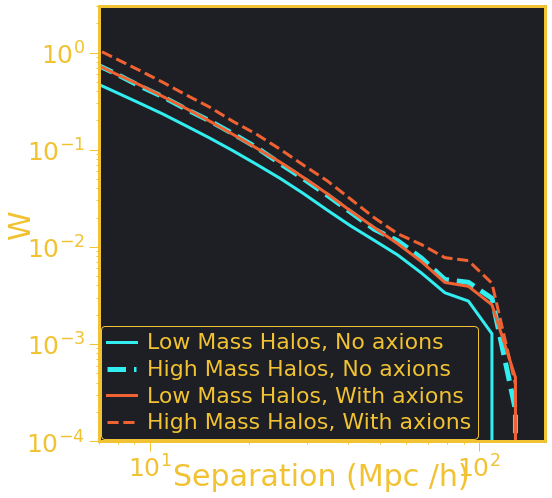

In [192]:
plt.figure(figsize=(8,8))
plt.rcParams['axes.facecolor'] = '#1E1F24'
plt.rcParams["axes.edgecolor"] = "#F1C232"
plt.rcParams["axes.linewidth"] = 3

corr_halohalo_Mass1=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_halohalo_Mass1, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid', color='#32eef1')
plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, No axions", lw=5, ls='dashed', color='#32eef1')

plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="Low Mass Halos, With axions", lw=3, ls='solid', color='#f16232')
plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, With axions", lw=3, ls='dashed', color='#f16232')

plt.xscale('log')
plt.legend(loc="lower left", fontsize=22, labelcolor="#F1C232", frameon=True, framealpha=1, edgecolor="#F1C232", markerfirst=True, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor', color="#F1C232", labelcolor="#F1C232")
plt.tick_params('both', length=10, width=1, which='major', labelcolor="#F1C232", color="#F1C232")
plt.xlabel("Separation (Mpc /h)", size=30, color="#F1C232", labelpad=-20)
plt.ylabel("W", fontsize=30, color="#F1C232", labelpad=-10)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4,3)
plt.xlim(7,10**2.2)
#plt.set_facecolor("black")

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.show()

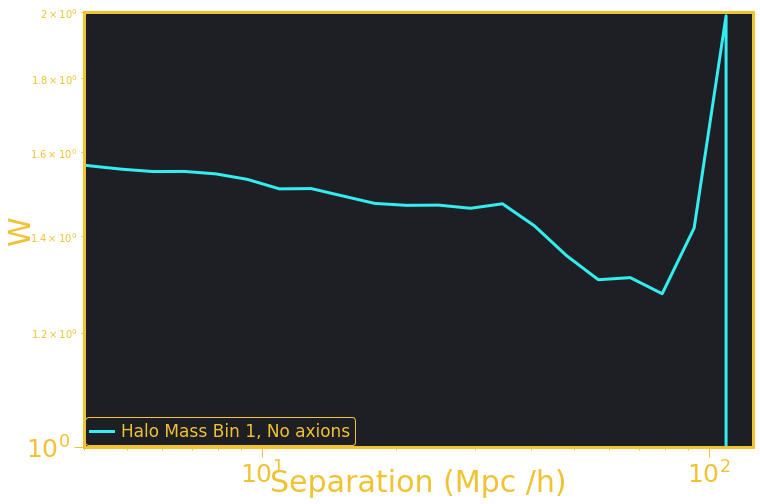

In [164]:
plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor'] = '#1E1F24'
plt.rcParams["axes.edgecolor"] = "#F1C232"
plt.rcParams["axes.linewidth"] = 3

corr_halohalo_Mass1=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')

plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1[4]['r'],corr_halohalo_Mass1_1_25_10/corr_halohalo_Mass1, ecolor="purple",capsize=5, label="Halo Mass Bin 1, No axions", lw=3, ls='solid', color='#32eef1')

plt.xscale('log')
plt.legend(loc="lower left", fontsize=17, labelcolor="#F1C232", frameon=True, framealpha=1, edgecolor="#F1C232", markerfirst=True, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor', color="#F1C232", labelcolor="#F1C232")
plt.tick_params('both', length=10, width=1, which='major', labelcolor="#F1C232", color="#F1C232")
plt.xlabel("Separation (Mpc /h)", size=30, color="#F1C232", labelpad=-20)
plt.ylabel("W", fontsize=30, color="#F1C232", labelpad=-10)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1,2)
plt.xlim(4,10**2.1)
#plt.set_facecolor("black")

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.show()

In [159]:
print(corr_halohalo_Mass1_1_25_10/corr_halohalo_Mass1)

[ 5.58730161  0.91764691  2.25619816  1.62413287  2.01360833  1.69028061
  1.70372357  1.96631737  1.89228577  1.91176316  1.75654564  1.78862987
  1.69554652  1.73981137  1.74241666  1.69928308  1.64283926  1.64027615
  1.59556135  1.58010153  1.5743597   1.57338285  1.5650837   1.55733899
  1.55142699  1.55180334  1.54572454  1.53225649  1.50921924  1.50989717
  1.49215216  1.47465618  1.47009955  1.47065174  1.46325067  1.47372466
  1.42284381  1.35710476  1.30573682  1.3101213   1.27695376  1.4179382
  1.98870604 -0.28475705  0.02996841  0.04142341  0.05970142  0.07298521
  0.17739145]


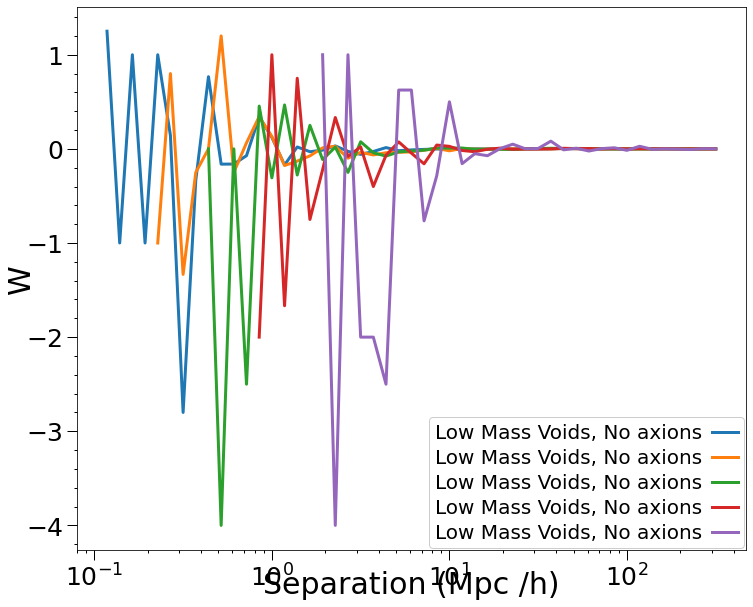

In [4]:
plt.figure(figsize=(12,10))

corr_voidhalo_HaloMass1_VoidMass1=np.load('corr_voidhalo_HaloMass1_VoidMass1.npy')
corr_voidhalo_HaloMass2_VoidMass1=np.load('corr_voidhalo_HaloMass2_VoidMass1.npy')
corr_voidhalo_HaloMass3_VoidMass1=np.load('corr_voidhalo_HaloMass3_VoidMass1.npy')
corr_voidhalo_HaloMass4_VoidMass1=np.load('corr_voidhalo_HaloMass4_VoidMass1.npy')
corr_voidhalo_HaloMass5_VoidMass1=np.load('corr_voidhalo_HaloMass5_VoidMass1.npy')


plt.errorbar(np.logspace(-1,2.5)[1:],corr_voidhalo_HaloMass1_VoidMass1, ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid')
plt.errorbar(np.logspace(-1,2.5)[1:],corr_voidhalo_HaloMass2_VoidMass1, ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid')
plt.errorbar(np.logspace(-1,2.5)[1:],corr_voidhalo_HaloMass3_VoidMass1, ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid')
plt.errorbar(np.logspace(-1,2.5)[1:],corr_voidhalo_HaloMass4_VoidMass1, ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid')
plt.errorbar(np.logspace(-1,2.5)[1:],corr_voidhalo_HaloMass5_VoidMass1, ecolor="purple",capsize=5, label="Low Mass Voids, No axions", lw=3, ls='solid')

#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_voidhalo_HaloMass2_VoidMass1[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, Low Mass Voids, No axions", lw=3, ls='dashed', color='#32eef1')

plt.xscale('log')
plt.legend(loc="lower right", fontsize=20, frameon=True, framealpha=1, markerfirst=False, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.axvline(x=12.26283681347605, ls='-.', color='#32eef1', lw=3, alpha=0.7)
#plt.axvline(x=12.635481948673336, ls='-.', color='#f16232', lw=3, alpha=0.7)
#plt.axvline(x=22.243157436562328, ls='-.', color='#f13292', lw=3, alpha=0.7)
#plt.axvline(x=24.1819449689155, ls='-.', color='#92f132', lw=3, alpha=0.7)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor')
plt.tick_params('both', length=10, width=1, which='major')
plt.xlabel("Separation (Mpc /h)", size=30, labelpad=-20)
plt.ylabel("W", fontsize=30, labelpad=-10)
plt.xscale('log')
#plt.ylim(-1.2,0.4)
#plt.xlim(5,10**2)
#plt.set_facecolor("black")

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
#plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.show()

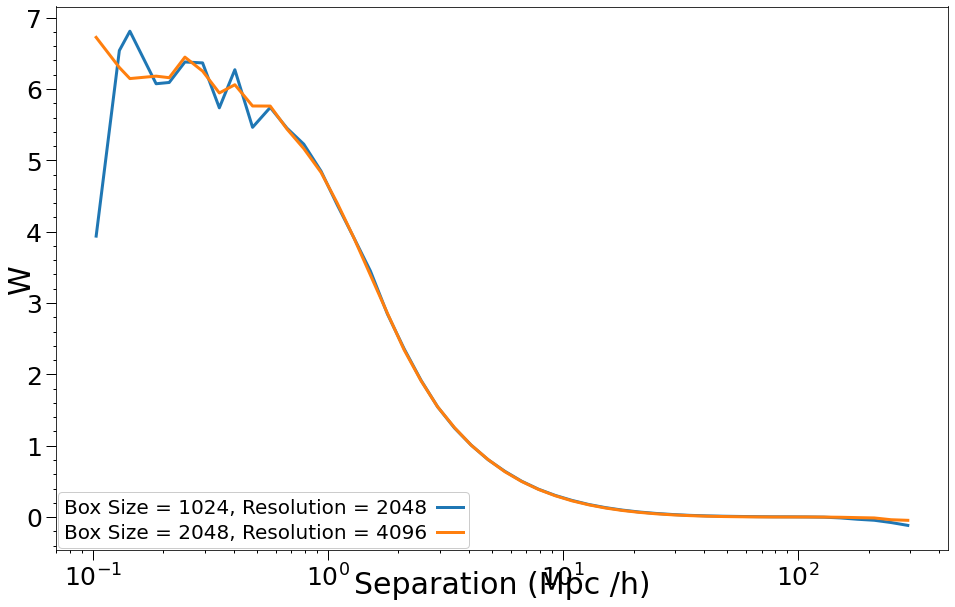

In [34]:
plt.figure(figsize=(16,10))

corr_halohalo_Mass1_1024=np.load('halohalocorr mass 1 no axion.npy')
corr_halohalo_Mass2_1024=np.load('halohalocorr mass 2 no axion.npy')
corr_halohalo_Mass1_1_25_10=np.load('halohalocorr mass 1 1 25 10.npy')
x_values=np.load('x_values.npy')



corr_halohalo_Mass1_2048=np.load('corr_halohalo_Mass1.npy')
corr_halohalo_Mass2_2048=np.load('corr_halohalo_Mass2.npy')
corr_halohalo_Mass3_2048=np.load('corr_halohalo_Mass3.npy')
corr_halohalo_Mass4_2048=np.load('corr_halohalo_Mass4.npy')
corr_halohalo_Mass5_2048=np.load('corr_halohalo_Mass5.npy')

plt.errorbar(x_values,corr_halohalo_Mass1_1024, ecolor="purple",capsize=5, lw=3, ls='solid', label="Box Size = 1024, Resolution = 2048")
#plt.errorbar(x_values,corr_halohalo_Mass2_1024, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid', color="red")
#plt.errorbar(x_values,corr_halohalo_Mass3[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')
#plt.errorbar(x_values,corr_halohalo_Mass4[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')
#plt.errorbar(x_values,corr_halohalo_Mass5[4]['corr'], ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')


plt.errorbar(x_values,corr_halohalo_Mass1_2048, ecolor="purple",capsize=5, lw=3, ls='solid', label="Box Size = 2048, Resolution = 4096")
#plt.errorbar(x_values,corr_halohalo_Mass2_2048, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid', color="blue")
#plt.errorbar(x_values,corr_halohalo_Mass3_2048, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')
#plt.errorbar(x_values,corr_halohalo_Mass4_2048, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')
#plt.errorbar(x_values,corr_halohalo_Mass5_2048, ecolor="purple",capsize=5, label="Low Mass Halos, No axions", lw=3, ls='solid')


#plt.errorbar(corr_voidhalo_HaloMass1_VoidMass1,corr_halohalo_Mass2[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, No axions", lw=5, ls='dashed')

#plt.errorbar(x_values,corr_halohalo_Mass1_1_25_10, ecolor="purple",capsize=5, label="Low Mass Halos, With axions", lw=3, ls='solid')
#plt.errorbar(corr_voidhalo_HaloMass2_VoidMass1[4]['r'],corr_halohalo_Mass2_1_25_10[4]['corr'], ecolor="purple",capsize=5, label="High Mass Halos, With axions", lw=3, ls='dashed')

plt.xscale('log')
#plt.yscale('log')

plt.legend(loc="lower left", fontsize=20, frameon=True, framealpha=1, markerfirst=False, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

#plt.axvline(x=12.26283681347605, ls='-.', color='#32eef1', lw=3, alpha=0.7)
#plt.axvline(x=12.635481948673336, ls='-.', color='#f16232', lw=3, alpha=0.7)
#plt.axvline(x=22.243157436562328, ls='-.', color='#f13292', lw=3, alpha=0.7)
#plt.axvline(x=24.1819449689155, ls='-.', color='#92f132', lw=3, alpha=0.7)

plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor')
plt.tick_params('both', length=10, width=1, which='major')
plt.xlabel("Separation (Mpc /h)", size=30, labelpad=-20)
plt.ylabel("W", fontsize=30, labelpad=-10)
plt.xscale('log')

In [30]:
print(corr_halohalo_Mass1_2048)

[ 6.72307711e+00  6.30088514e+00  6.14563123e+00  6.17964087e+00
  6.15808840e+00  6.44619122e+00  6.25017886e+00  5.94400016e+00
  6.05923739e+00  5.76144327e+00  5.76032324e+00  5.43829880e+00
  5.16456781e+00  4.83046058e+00  4.40084265e+00  3.91777429e+00
  3.39082421e+00  2.85665614e+00  2.34347155e+00  1.91080079e+00
  1.54519586e+00  1.25419315e+00  1.00646230e+00  8.06395305e-01
  6.35635427e-01  4.98383299e-01  3.87515664e-01  2.98645526e-01
  2.27168522e-01  1.71238751e-01  1.26327531e-01  9.21315301e-02
  6.57891777e-02  4.56843482e-02  3.07349148e-02  2.00015244e-02
  1.23568530e-02  7.17447677e-03  3.99191210e-03  2.01802302e-03
  9.71199967e-04  9.04321614e-04  8.75981327e-04 -4.14858262e-04
 -3.00312356e-03 -8.04722116e-03 -1.24242579e-02 -3.74538207e-02
 -4.58969830e-02]


In [33]:
print(corr_halohalo_Mass1_1024)

[ 3.93750062e+00  6.53846347e+00  6.80952516e+00  6.07317210e+00
  6.09091033e+00  6.37837972e+00  6.36527086e+00  5.73567003e+00
  6.26947492e+00  5.46230045e+00  5.74077182e+00  5.45049156e+00
  5.22684218e+00  4.84796513e+00  4.37620819e+00  3.91845913e+00
  3.44777249e+00  2.84654106e+00  2.35872880e+00  1.91737989e+00
  1.54522765e+00  1.24834451e+00  1.00736002e+00  8.04426041e-01
  6.41246160e-01  5.02114305e-01  3.90762097e-01  3.03232783e-01
  2.33161434e-01  1.75836535e-01  1.32075935e-01  9.75279917e-02
  7.07266750e-02  5.07293350e-02  3.52985147e-02  2.39171278e-02
  1.64237495e-02  1.16440183e-02  8.23251138e-03  5.39138088e-03
  3.36839949e-03  2.76392833e-03  1.27423278e-03 -1.58478329e-03
 -1.23912833e-02 -3.08899635e-02 -4.48894585e-02 -7.66999651e-02
 -1.16882307e-01]
